In [12]:
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Vader
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API Keys
consumer_key = "gGJeIAmtDHEhn6J0ceJ0n9FSd"
consumer_secret = "GyCJnSp7Lxd2fTg9APGl5frkj1QkzQBwOtim0WNiC0btumfKRJ"
access_token = "922954914761977856-dxkGnqYCUlabtzj98ibbdAKz9EBSU8X"
access_token_secret = "kF9pZBKi42wN188kmZwYZYCoZxCK7Yep958XaBAoQN5e1"

#Tweepy Authenitcation
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [14]:
# Target Account
target_terms = ("@BBC", "@CBS", "@CNN",
                "@FoxNews", "@nytimes")

counter = 1

# Variables for holding sentiments
sentiments = []

for target in target_terms:

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target)

        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweets_ago = counter
                
        # Add sentiments for each tweet into an array
                sentiments.append({"Date": tweet["created_at"], 
                            "Text" : tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                            "Account": target,
                           "Tweets Ago": counter})
                
                counter = counter + 1


In [40]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head(10)

,Account,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
0,@BBC,0.4877,Sat Nov 04 15:32:06 +0000 2017,0.843,0.000,0.157,"Amy Winehouse, @Adele, @LoyleCarner &amp; @Ell...",1
1,@BBC,0.0000,Sat Nov 04 15:00:12 +0000 2017,1.000,0.000,0.000,Trucker culture is dying with automation – and...,2
2,@BBC,0.5994,Sat Nov 04 14:53:43 +0000 2017,0.837,0.000,0.163,RT @BBCMOTD: Peter Crouch = super sub.\n\nHis ...,3
3,@BBC,0.0000,Sat Nov 04 14:53:11 +0000 2017,1.000,0.000,0.000,RT @BBCSport: FT England 29-10 Lebanon\n\nGet ...,4
4,@BBC,0.0000,Sat Nov 04 14:52:17 +0000 2017,1.000,0.000,0.000,RT @BBCSport: Felipe Massa will retire from #F...,5
5,@BBC,0.4588,Sat Nov 04 14:44:58 +0000 2017,0.857,0.000,0.143,RT @BBCOne: Welcome to the family business. \n...,6
6,@BBC,0.0000,Sat Nov 04 14:26:38 +0000 2017,1.000,0.000,0.000,RT @bbcthree: This barber reminds us how small...,7
7,@BBC,0.6369,Sat Nov 04 14:26:06 +0000 2017,0.846,0.000,0.154,"Did you know there’s a best time to eat, think...",8
8,@BBC,-0.6249,Sat Nov 04 14:03:04 +0000 2017,0.638,0.362,0.000,Police discover a suspected 'WW2 bomb' is actu...,9
9,@BBC,-0.3612,Sat Nov 04 13:30:07 +0000 2017,0.878,0.122,0.000,"'We have our stories, struggles &amp; power. W...",10


In [32]:
sentiments_pd.to_csv("Tweets.csv", index=False)

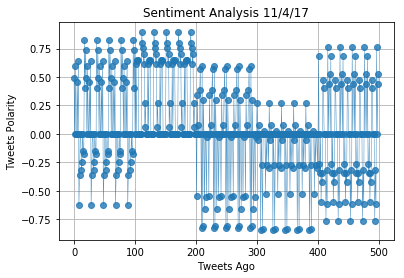

In [44]:
plt.plot(np.arange(len(sentiments_pd["Compound"])),
        sentiments_pd["Compound"], marker="o", linewidth=0.5,
        alpha=0.8)

plt.title("Sentiment Analysis 11/4/17")
plt.grid(True)
plt.ylabel("Tweets Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Sentiments.png")
plt.show()

In [35]:
accounts = sentiments_pd.groupby(["Account"])
mean = accounts['Compound'].mean()
mean.head()

Account
@BBC        0.112850
@CBS        0.332260
@CNN       -0.058275
@FoxNews   -0.136865
@nytimes   -0.018400
Name: Compound, dtype: float64

In [36]:
mean = pd.DataFrame(mean)
mean.reset_index(inplace=True)
mean

,Account,Compound
0,@BBC,0.112850
1,@CBS,0.332260
2,@CNN,-0.058275
3,@FoxNews,-0.136865
4,@nytimes,-0.018400


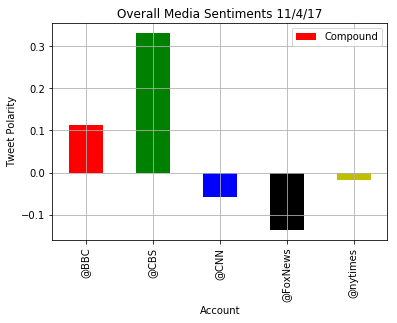

In [43]:
my_colors = 'rgbkymc'
mean.plot.bar(x="Account", y="Compound", color= my_colors)
plt.title("Overall Media Sentiments 11/4/17")
plt.xlabel("Account")
plt.ylabel("Tweet Polarity")
plt.grid(True)
plt.savefig("BarSentiments.png")
plt.show()

In [ ]:
#Trends
#1. Most tweets are relatively neutral
#2. The overall senitments of all tweets is neutral
#3. CBS has the most positive tweets while Fox News has the most negative tweets